In [5]:
import sys
import os
module_path = os.path.abspath(os.path.join('../../../../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

%config InlineBackend.figure_format = 'retina'

In [6]:
from society.agents import AnalyticalAgent
from society.structure.network import RealNetwork
from society.beliefs import Distribution, BeliefDistribution
from society.structure import AgentNetwork
from updates import Interactions, UpdateRule
from simulation import Simulation, Insights
from plotting.basic import *
from matplotlib import pyplot as plt
from computations.insights.relative import diversity, disagreement
from plotting.summaries import *
from utils.io import save_arrays

In [7]:
data_path = '../../../../results/data/real_networks/GooglePlus/'

In [8]:
linespace = Distribution(type="linespace", range=(-1,1))
unique = Distribution(type="unique", value=0.15)
belief_distribution = BeliefDistribution(unique, linespace)
network = RealNetwork("Google+", "../../../../data/")
agent_network = AgentNetwork(belief_distribution, network, agent_type=AnalyticalAgent)

update_rule = UpdateRule(assimilation_bias=0, evaluation_bias=0, rewire_probability=0)
interactions = Interactions(update_rule, interacting_agents=True)
insights = Insights()
simulation = Simulation(1000, insights)

In [9]:
agent_network.size

107614

# Total Consensus

In [10]:
simulation.run(interactions, agent_network)

Progress: 100%|██████████| 1000/1000 [1:18:31<00:00,  4.71s/it]


/Users/martinprieto/Desktop/New_Honours_Refactored/src/plotting/basic.py:41: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.imshow(histogram.T, aspect="auto", interpolation=interpolation , vmax=np.quantile(histogram, qmax))


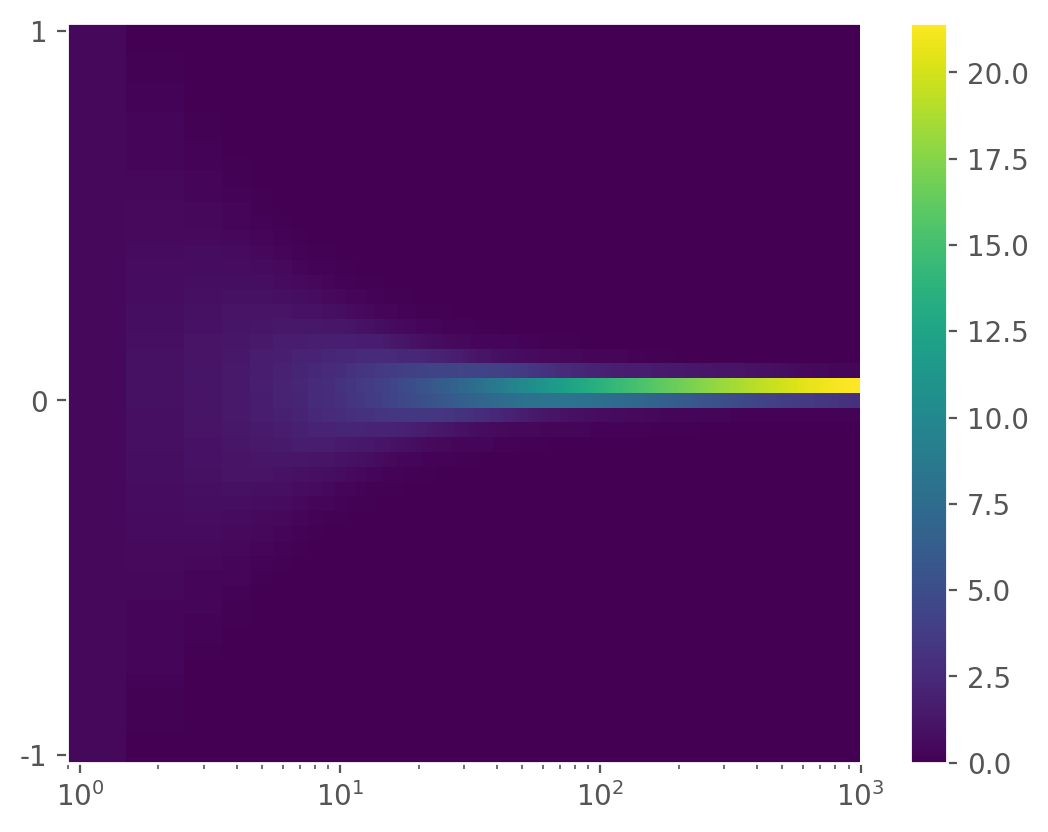

In [11]:
# Store results
with open(data_path + 'total_consensus.npy', 'wb') as f:
    np.save(f, simulation.insights.belief_evolution)
f.close()
plot_density_of_opinions(simulation.insights.belief_evolution)

# Fragmentation

In [ ]:
interactions.update_rule.evaluation_bias = 0.3
simulation.run(interactions, agent_network)

In [ ]:
# Store results
with open(data_path + 'clustering.npy', 'wb') as f:
    np.save(f, simulation.insights.belief_evolution)
f.close()
plot_density_of_opinions(simulation.insights.belief_evolution)

# Dissensus

In [ ]:
interactions.update_rule.evaluation_bias = 0.3
interactions.update_rule.assimilation_bias = 1
simulation.run(interactions, agent_network)

In [ ]:
# Store results
with open(data_path + 'dissensus.npy', 'wb') as f:
    np.save(f, simulation.insights.belief_evolution)
f.close()
plot_density_of_opinions(simulation.insights.belief_evolution)

# Polarisation

In [ ]:
interactions.update_rule.evaluation_bias = 0.3
interactions.update_rule.assimilation_bias = 0
extreme_num = agent_network.size/10
agent_network.set_extreme_agents(0.01, extreme_num, extreme_num)
simulation.run(interactions, agent_network)

In [ ]:
# Store results
with open(data_path + 'polarisation.npy', 'wb') as f:
    np.save(f, simulation.insights.belief_evolution)
f.close()
plot_density_of_opinions(simulation.insights.belief_evolution)